This problem involves the OJ data set which is part of the ISLP
package.

Create a training set containing a random sample of 800 obser-
vations, and a test set containing the remaining observations

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
from sklearn import tree
from ISLP import load_data

OJ = load_data("OJ")
OJ["Store7"] = OJ["Store7"].replace({"No":0, "Yes":1})
OJ["Purchase"] = OJ["Purchase"].replace({"CH":0, "MM":1})

(train, test) = skm.train_test_split(OJ, test_size=0.252, random_state=0)

len(train)

800

Fit a tree to the training data, with Purchase as the response
and the other variables as predictors. What is the training error
rate?


In [74]:
X_train = train.drop(["Purchase"], axis = 1)

model = tree.DecisionTreeClassifier()
model.fit(X_train, train["Purchase"])

pred = model.predict(X_train)

np.mean(train["Purchase"] - pred)

0.00875

Create a plot of the tree, and interpret the results. How many
terminal nodes does the tree have?

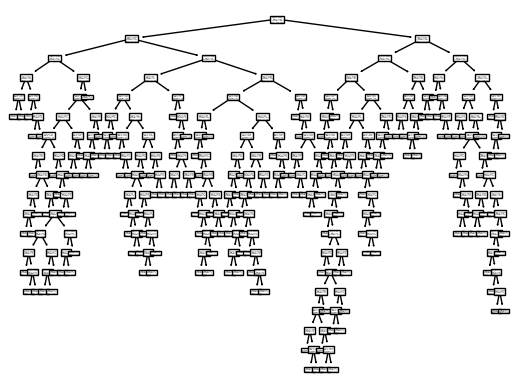

In [75]:
tree.plot_tree(model);

Use the export_tree() function to produce a text summary of
the fitted tree. Pick one of the terminal nodes, and interpret the
information displayed.

In [47]:
r = tree.export_text(model)

r

'|--- feature_8 <= 0.51\n|   |--- feature_8 <= 0.28\n|   |   |--- feature_8 <= 0.06\n|   |   |   |--- feature_1 <= 1.50\n|   |   |   |   |--- feature_0 <= 252.00\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- feature_0 >  252.00\n|   |   |   |   |   |--- class: 1\n|   |   |   |--- feature_1 >  1.50\n|   |   |   |   |--- feature_0 <= 268.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |   |--- feature_0 >  268.50\n|   |   |   |   |   |--- feature_8 <= 0.00\n|   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |--- feature_8 >  0.00\n|   |   |   |   |   |   |--- class: 0\n|   |   |--- feature_8 >  0.06\n|   |   |   |--- feature_0 <= 273.50\n|   |   |   |   |--- feature_10 <= 1.94\n|   |   |   |   |   |--- feature_0 <= 263.50\n|   |   |   |   |   |   |--- feature_16 <= 1.50\n|   |   |   |   |   |   |   |--- feature_0 <= 228.00\n|   |   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |   |--- feature_0 >  228.00\n|   |   |   |   |   |   |   |   |--- featur

Predict the response on the test data, and produce a confusion
matrix comparing the test labels to the predicted test labels.
What is the test error rate?

In [76]:
X_test = test.drop(["Purchase"], axis = 1)

test_pred = model.predict(X_test)

np.mean(test["Purchase"] - test_pred)

-0.014814814814814815

Use cross-validation on the training set in order to determine
the optimal tree size

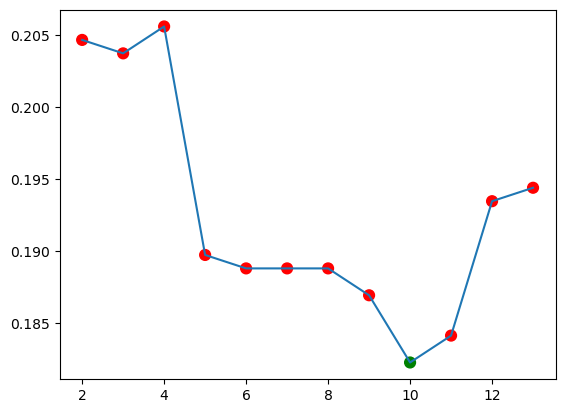

In [72]:
X = OJ.drop(["Purchase"], axis = 1)

cv = []
nodes = []

for n_nodes in range(2, 14):
    model1 = tree.DecisionTreeClassifier(max_leaf_nodes = n_nodes)
    score = -skm.cross_val_score(model1, X, OJ["Purchase"], cv = 10, scoring= "neg_mean_squared_error",error_score="raise") 
    cv.append(np.mean(score))
    nodes.append(n_nodes)
    
df = pd.DataFrame({"cv":cv,"nodes":nodes})
df["min"] = df["cv"] == df["cv"].min()

plt.plot(nodes, cv)
plt.scatter(df["nodes"], df["cv"], s=60, c=df["min"].map({True: "g", False: "r"}))

Produce a pruned tree corresponding to the optimal tree size
obtained using cross-validation. If cross-validation does not lead
to selection of a pruned tree, then create a pruned tree with five
terminal nodes.

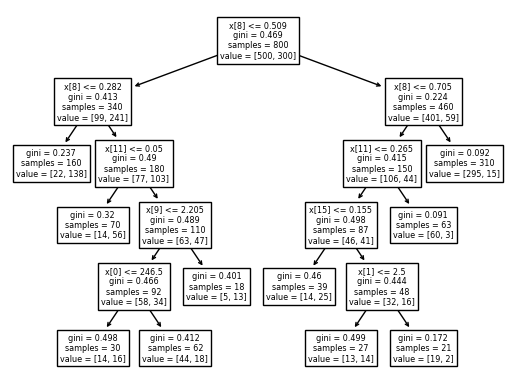

In [78]:
best = tree.DecisionTreeClassifier(max_leaf_nodes = 10)

best.fit(X_train, train["Purchase"])

tree.plot_tree(best);

Compare the training error rates between the pruned and un-
pruned trees. Which is higher?

In [79]:
pred = best.predict(X_train)

np.mean(train["Purchase"] - pred)

-0.055

Compare the test error rates between the pruned and unpruned
trees. Which is higher?

In [80]:
pred = best.predict(X_test)

np.mean(test["Purchase"] - pred)

-0.05185185185185185